<a href="https://colab.research.google.com/github/sudar-coder321/Movies_Data_Knowledge_Graph_Implementation/blob/main/Movies_Data_Knowledge_Graph_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing the Spacy Module

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


## Changing sentence to verify different outputs

In [2]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


## Importing Libraries

In [3]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

## Read Data

In [4]:
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

(4318, 1)

In [5]:
df = candidate_sentences

In [6]:
df.shape

(4318, 1)

In [7]:
df.columns

Index(['sentence'], dtype='object')

In [8]:
len(df.columns)

1

In [9]:
df['sentence'].sample(100)

318                                                                                             it is the second film in the it film series.
3122                                                                                         the movie was shot entirely in london, england.
453                         north america's first and longest running short film festival is the yorkton film festival, established in 1947.
3579                                                                                        jimmy goes to his wife, annabeth, and confesses.
588                                                                                                  the film was released on july 26, 2013.
                                                                        ...                                                                 
1500    chittor v. nagaiah was the first multilingual indian film actor, thespian, composer, director, producer, writer and playback singer.
3448         

In [11]:
df = df.dropna()

In [12]:
df.shape

(4318, 1)

In [15]:
df = df.drop_duplicates()

In [16]:
df

,sentence
0,"confused and frustrated, connie decides to leave on her own."
1,"later, a woman’s scream is heard in the distance."
2,christian is then paralyzed by an elder.
3,the temple is set on fire.
4,"outside, the cult wails with him."
...,...
4313,"confidencial also responded negatively, calling the film a barren drama, unsubtle and self-indulgent."
4314,and le parisien gave the film their highest five-star rating.
4315,"the museum collection includes 37,000 film titles, 60,000 posters, 700,000 photographs and 20,000 books."
4316,"its predecessor was the dutch historical film archive, founded in 1946."


In [17]:
df.shape

(3495, 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 0 to 4317
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  3495 non-null   object
dtypes: object(1)
memory usage: 54.6+ KB


In [19]:
df.describe

<bound method NDFrame.describe of                                                                                                       sentence
0                                                 confused and frustrated, connie decides to leave on her own.
1                                                            later, a woman’s scream is heard in the distance.
2                                                                     christian is then paralyzed by an elder.
3                                                                                   the temple is set on fire.
4                                                                            outside, the cult wails with him.
...                                                                                                        ...
4313     confidencial also responded negatively, calling the film a barren drama, unsubtle and self-indulgent.
4314                                             and le parisien gave the film

In [20]:
df.describe()

,sentence
count,3495
unique,3495
top,hong kong is a filmmaking hub for the chinese-speaking world and east asia in general.
freq,1


In [21]:
words_list = list(df['sentence'])

In [22]:
words_list

['confused and frustrated, connie decides to leave on her own.',
 'later, a woman’s scream is heard in the distance.',
 'christian is then paralyzed by an elder.',
 'the temple is set on fire.',
 'outside, the cult wails with him.',
 "it's a parable of a woman's religious awakening—",
 'c. mackenzie, and craig vincent joined the cast.',
 'later, craig di francia and action bronson were revealed to have joined the cast.',
 'sebastian maniscalco and paul ben-victor were later revealed as being part of the cast.',
 'we just tried to make the film.',
 'we went through all these tests and things  ',
 "m global was also circling to bid for the film's international sales rights.",
 'canadian musician robbie robertson supervised the soundtrack.',
 'it features both original and existing music tracks.',
 'it is the worst reviewed film in the franchise.',
 'but she injures quicksilver and accidentally kills mystique before flying away.',
 'military forces tasked with her arrest.',
 "the train is

In [23]:
len(words_list)

3495

In [24]:
for word in words_list:
  print("sentence has",len(word.split()),"words")

sentence has 10 words
sentence has 9 words
sentence has 7 words
sentence has 6 words
sentence has 6 words
sentence has 8 words
sentence has 8 words
sentence has 14 words
sentence has 14 words
sentence has 7 words
sentence has 8 words
sentence has 13 words
sentence has 7 words
sentence has 8 words
sentence has 9 words
sentence has 11 words
sentence has 6 words
sentence has 10 words
sentence has 6 words
sentence has 9 words
sentence has 11 words
sentence has 11 words
sentence has 5 words
sentence has 7 words
sentence has 8 words
sentence has 9 words
sentence has 10 words
sentence has 13 words
sentence has 30 words
sentence has 12 words
sentence has 6 words
sentence has 13 words
sentence has 8 words
sentence has 7 words
sentence has 10 words
sentence has 13 words
sentence has 4 words
sentence has 12 words
sentence has 8 words
sentence has 8 words
sentence has 11 words
sentence has 9 words
sentence has 7 words
sentence has 5 words
sentence has 9 words
sentence has 8 words
sentence has 10 w

In [25]:
df.isnull()

,sentence
0,False
1,False
2,False
3,False
4,False
...,...
4313,False
4314,False
4315,False
4316,False


In [26]:
df.head()

,sentence
0,"confused and frustrated, connie decides to leave on her own."
1,"later, a woman’s scream is heard in the distance."
2,christian is then paralyzed by an elder.
3,the temple is set on fire.
4,"outside, the cult wails with him."


In [27]:
df.tail()

,sentence
4313,"confidencial also responded negatively, calling the film a barren drama, unsubtle and self-indulgent."
4314,and le parisien gave the film their highest five-star rating.
4315,"the museum collection includes 37,000 film titles, 60,000 posters, 700,000 photographs and 20,000 books."
4316,"its predecessor was the dutch historical film archive, founded in 1946."
4317,", 1920'sfilmstar greta garbo by alexander binder,"


In [28]:
df.isna()

,sentence
0,False
1,False
2,False
3,False
4,False
...,...
4313,False
4314,False
4315,False
4316,False


In [29]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


In [30]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [31]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [32]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [00:34<00:00, 124.80it/s]


In [33]:
entity_pairs[5:20]

[['it', 'religious  awakening'],
 ['c. mackenzie', 'craig cast'],
 ['later craig di francia', 'action cast'],
 ['sebastian  maniscalco', 'later paul ben cast'],
 ['we', 'just  film'],
 ['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men']]

In [34]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [35]:
get_relation("John completed the task")

'completed'

In [36]:
relations = [get_relation(i) for i in 
             tqdm(candidate_sentences['sentence'])]

100%|██████████| 4318/4318 [00:32<00:00, 131.91it/s]


In [39]:
pd.Series(relations).value_counts()[:20]

is             370
was            297
released on     87
include         73
were            71
are             71
released        40
's              38
composed by     35
have            31
has             31
became          31
become          29
released in     27
included        26
produced        22
called          22
made            20
had             20
considered      20
dtype: int64

In [40]:
source = [i[0] for i in entity_pairs]

target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

## Initialising the Knowledge Graph

In [41]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

## PLotting Graph with a Node limit

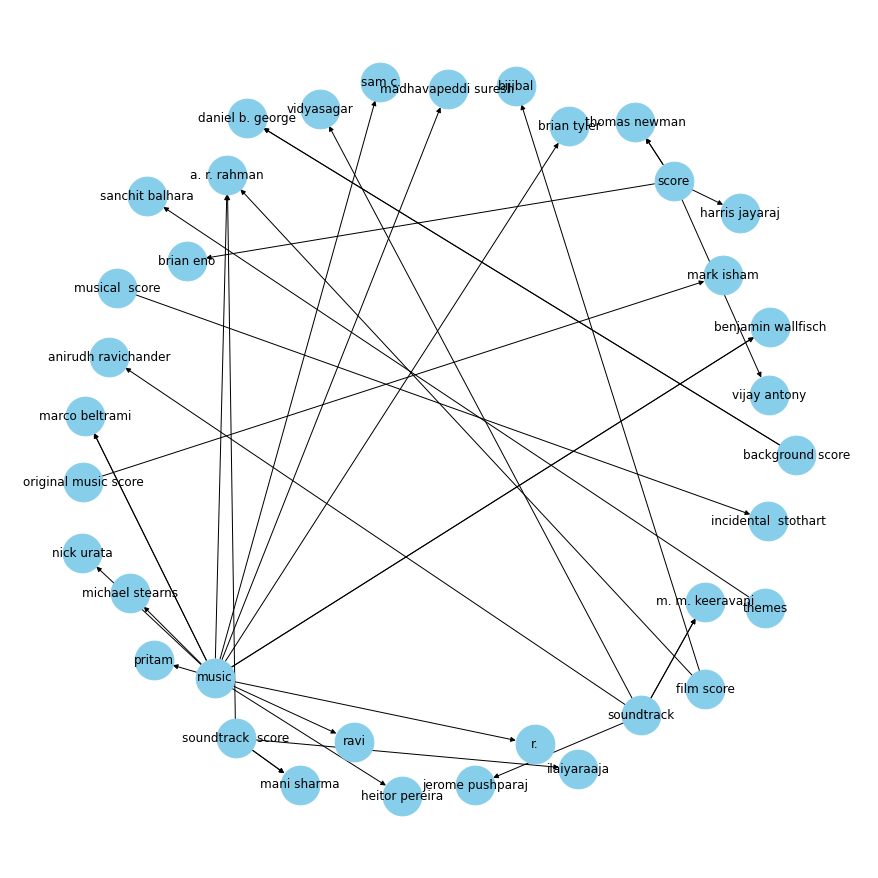

In [50]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 100) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

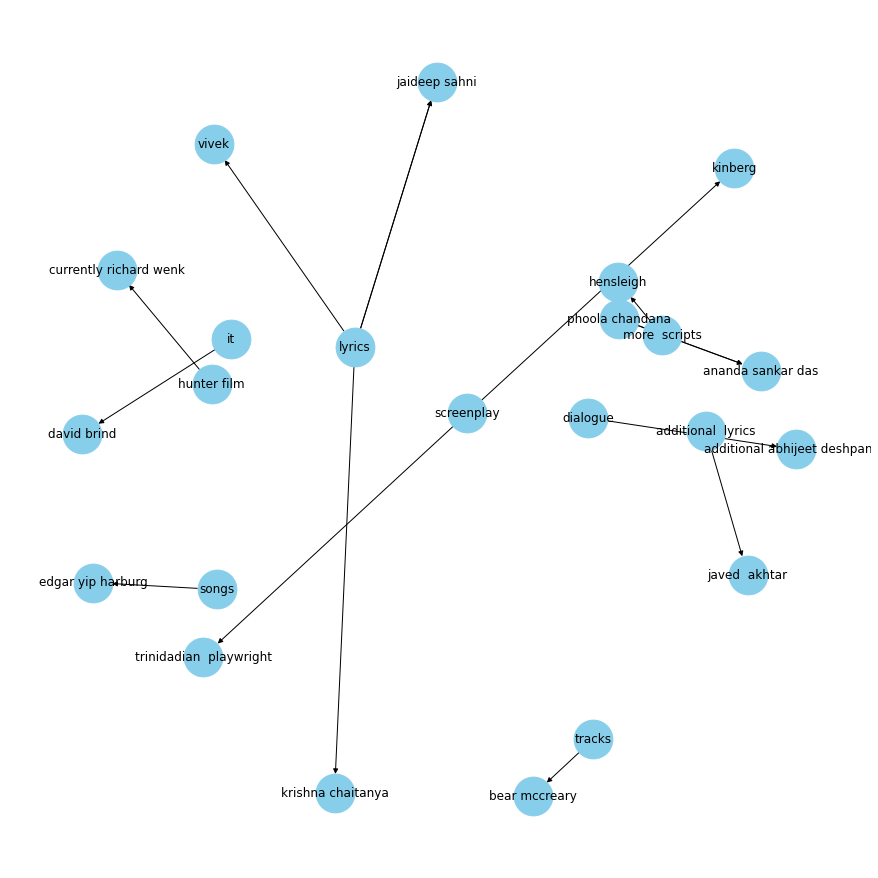

In [44]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

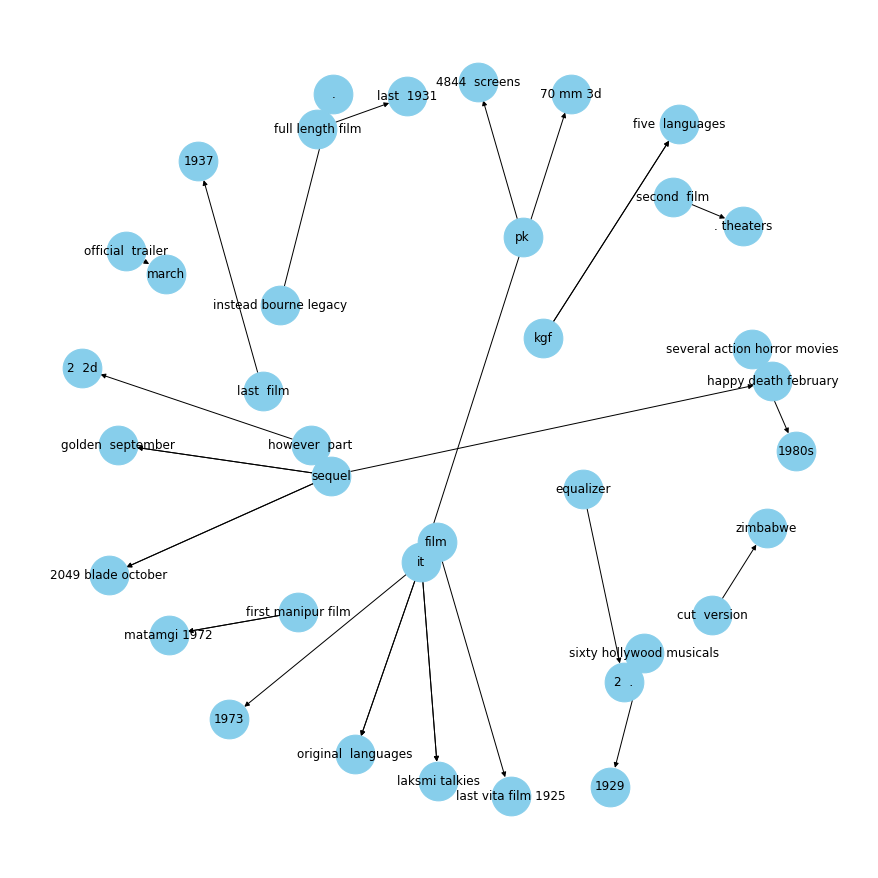

In [45]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

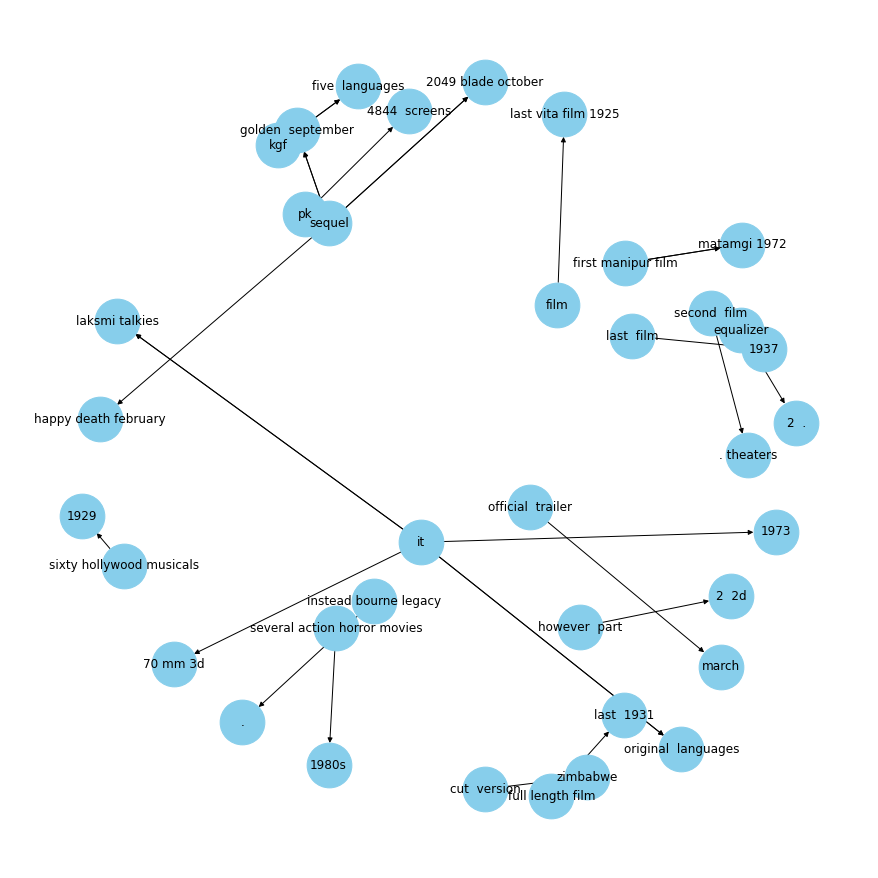

In [51]:

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

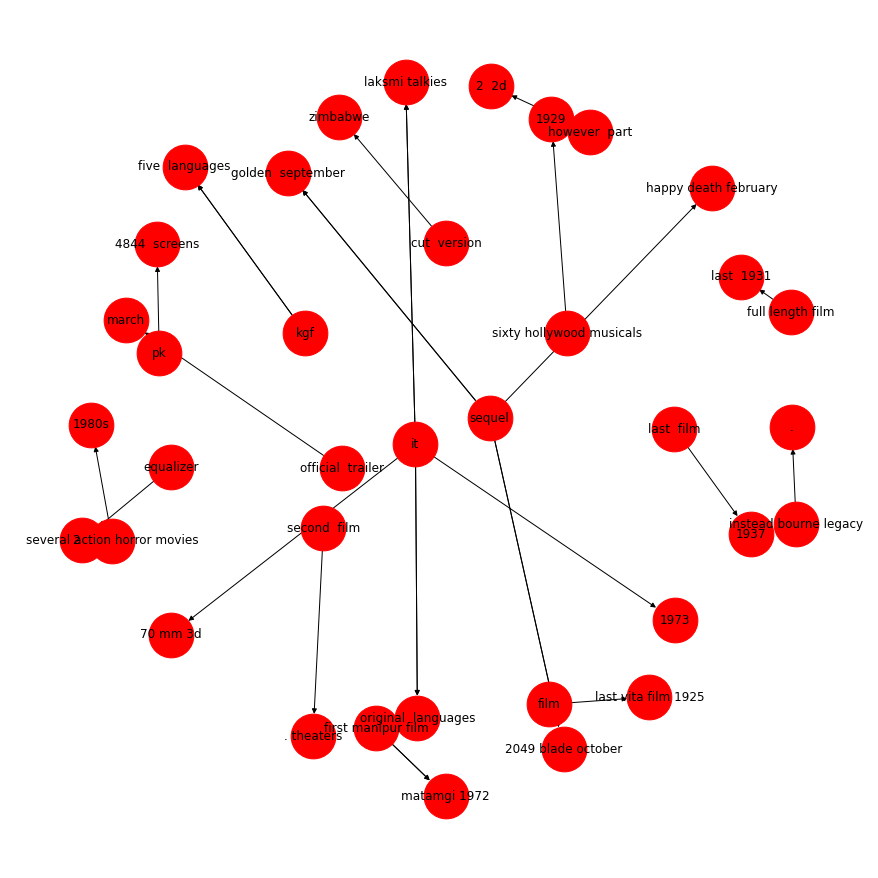

In [53]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=2000, edge_cmap=plt.cm.Reds, pos = pos)
plt.show()

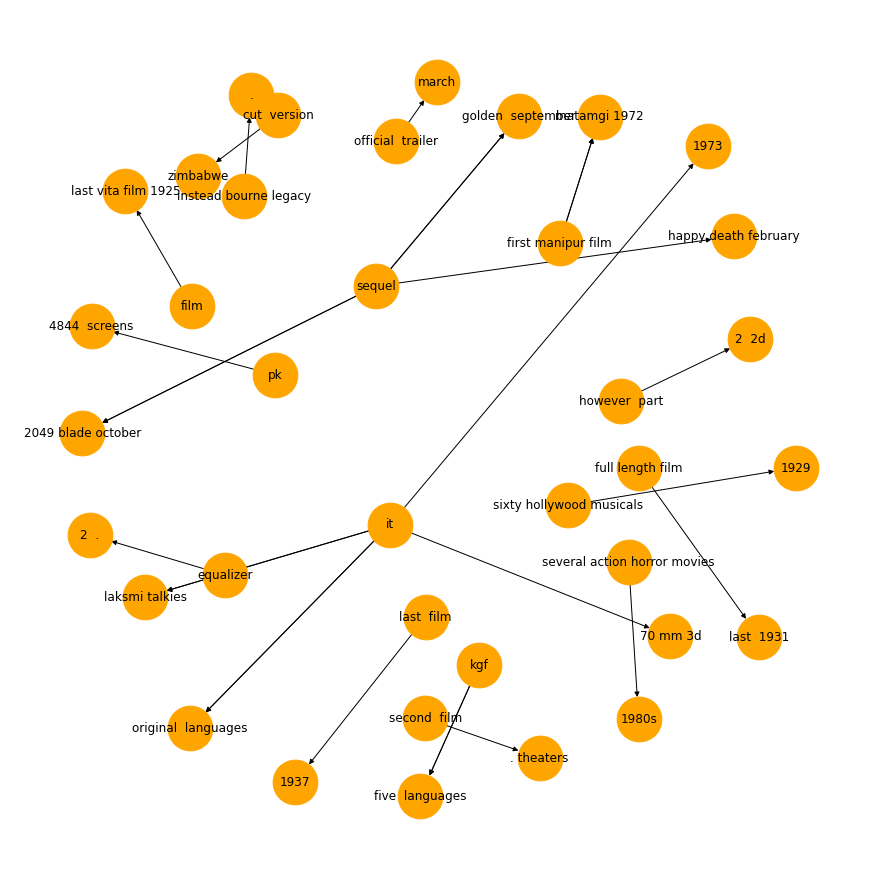

In [55]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='orange', node_size=2000, edge_cmap=plt.cm.Reds_r, pos = pos)
plt.show()

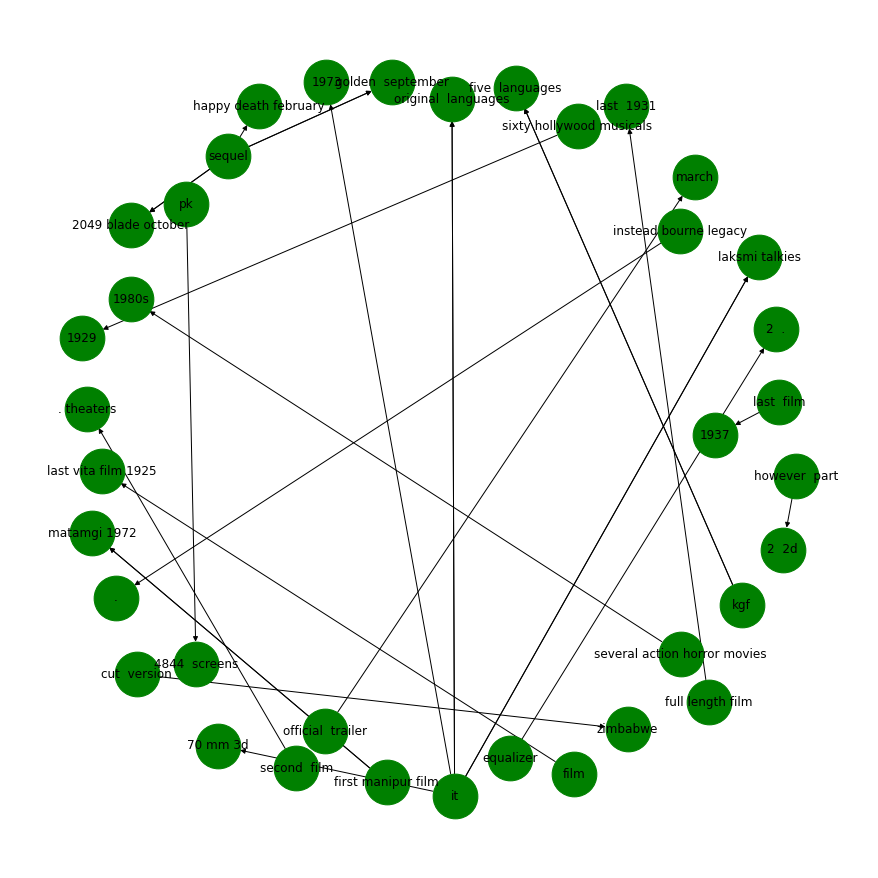

In [59]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 1000)
nx.draw(G, with_labels=True, node_color='green', node_size=2000, edge_cmap=plt.cm.Greens_r, pos = pos)
plt.show()

### After a particular value of K, the pattern forms a consistent Circle as noted from above diagrams